In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode

In [8]:
print(np.__version__)
print(pd.__version__)

1.23.0
1.3.4


In [9]:
def GetYearsNum(yearsData:list)->list:
    marrayNum = []
    for i in range(0,len(yearsData),4):
        tempData=yearsData[i:i+4]
        NumYear = sum(tempData)
        marrayNum.append(NumYear)
        print(tempData)
    return marrayNum

In [10]:
df = pd.read_csv('data/2007-2020全国结婚离婚数据.csv',encoding='gbk')
df.drop(labels=[0, 1], axis=0, inplace=True)
df.rename(columns={'Unnamed: 0':'省份'}, inplace=True)
df.head()

,省份,2007年第1季度结婚登记,2007年第1季度离婚登记,2007年第2季度结婚登记,2007年第2季度离婚登记,2007年第3季度结婚登记,2007年第3季度离婚登记,2007年第4季度结婚登记,2007年第4季度离婚登记,2008年第1季度结婚登记,...,2019年第3季度结婚登记,2019年第3季度离婚登记,2019年第4季度结婚登记,2019年第4季度离婚登记,2020年第1季度结婚登记,2020年第1季度离婚登记,2020年第2季度结婚登记,2020年第2季度离婚登记,2020年第3季度结婚登记,2020年第3季度离婚登记
2,全国合计,2395186,266404,4326249,595605,6190365,938240,9496787,1404047,2581768,...,7130794,3104131,9260139,4043224,1556948,612319,3878704,1594847,5894196,2669985
3,北京市,30991,6094,55880,12689,85788,19547,116649,26257,37407,...,98944,56720,128959,76356,16047,9189,46129,27873,77533,49355
4,天津市,17507,3712,34482,7841,54295,12424,75633,16847,37079,...,73631,51951,96424,69927,11471,7298,37058,25296,64465,45546
5,河北省,149724,12348,252201,27579,363505,43139,587430,59979,161443,...,319830,164263,420884,218142,47286,23677,154056,78334,259292,139862
6,山西省,44818,3030,92917,7078,136022,10580,233302,19458,54749,...,193106,55137,255043,73658,28686,9583,90893,27254,151875,46669


In [11]:
divorse_column, marry_column = [], []
quarter_list = []
for c in df.columns:
    if c.__contains__('离婚'):
        divorse_column.append(c)
        quarter_list.append('{}Q{}'.format(*re.findall("\d+", c)))
    elif c.__contains__('结婚'):
        marry_column.append(c)

In [12]:
#缺失值检测
df.isnull().sum()

省份               0
2007年第1季度结婚登记    0
2007年第1季度离婚登记    0
2007年第2季度结婚登记    0
2007年第2季度离婚登记    0
                ..
2020年第1季度离婚登记    0
2020年第2季度结婚登记    0
2020年第2季度离婚登记    0
2020年第3季度结婚登记    0
2020年第3季度离婚登记    0
Length: 111, dtype: int64

In [13]:
#查看类型
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 2 to 33
Columns: 111 entries, 省份 to 2020年第3季度离婚登记
dtypes: object(111)
memory usage: 28.0+ KB


In [14]:
d_data = df[divorse_column].values.tolist()
m_data = df[marry_column].values.tolist()

In [15]:
province_list = df['省份'].tolist()

def get_data(cate=0, measure=0, province='全国合计'):
    data = m_data if cate==0 else d_data
    data = data[province_list.index(province)]
    counter = 0
    
    if measure == 0:
        dt = [0, 0, 0, 0]
        for i in data:
            if counter > 51:
                break
            i = int(i.replace(',', ''))
            # dt[counter % 4] += i
            if counter % 4 == 0:
                last_q_value = 0
            v = i - last_q_value
            last_q_value = i
            dt[counter % 4] += v
            counter += 1
    elif measure == 1:
        dt = []
        for i in data:
            i = int(i.replace(',', ''))
            if counter % 4 == 3:
                dt.append(i)
            elif counter == 54:
                dt.append(i)
            counter += 1
    return dt 

In [16]:
# 各季度数据对比

In [17]:
pie = Pie(
    init_opts=opts.InitOpts(
        theme='macarons',
        width='1000px',
        height='600px')
)
pie.add("",
        [list(z) for z in zip(['Q1', 'Q2', 'Q3', 'Q4'], get_data(0, 0, '全国合计'))],
        # 指定饼图中心位置
        center=["25%", "50%"],
        # 将饼图尺寸相应缩小，不然饼图会重叠
        radius=["30%", "45%"],
        label_opts=opts.LabelOpts(is_show=True, formatter='{b}:{d}%'),
        itemstyle_opts={
            'normal': {
                'shadowColor': 'rgba(0, 0, 0, .5)',  # 阴影颜色
                'shadowBlur': 5,  # 阴影大小
                'shadowOffsetY': 2,  # Y轴方向阴影偏移
                'shadowOffsetX': 2,  # x轴方向阴影偏移
                'borderColor': '#fff'
            }
        }
        )

pie.add("",
        [list(z) for z in zip(['Q1', 'Q2', 'Q3', 'Q4'], get_data(1, 0, '全国合计'))],
        center=["75%", "50%"],
        radius=["30%", "45%"],
        label_opts=opts.LabelOpts(is_show=True, formatter='{b}:{d}%'),
        itemstyle_opts={
            'normal': {
                'shadowColor': 'rgba(0, 0, 0, .5)',  # 阴影颜色
                'shadowBlur': 5,  # 阴影大小
                'shadowOffsetY': 2,  # Y轴方向阴影偏移
                'shadowOffsetX': 2,  # x轴方向阴影偏移
                'borderColor': '#fff'
            }
        }
        )
pie.set_global_opts(
    title_opts=[
        dict(
            text='结婚',
            top='center',
            left='23%'
        ),
        dict(
            text='离婚',
            top='center',
            left='73%'
        ),
        dict(
            text='2007-2019年各季度结婚/离婚数据对比',
            left='center',
            top='1%',
            textStyle=dict(
                color='blue'))
    ],
    legend_opts=opts.LegendOpts(is_show=True, pos_top='7%'),
)
pie.set_colors(['#4a657a', '#b1cfa5', '#f5d69f', '#ef5055'])
pie.render_notebook()

In [18]:
d1, d2, d3 = [], [], []
for p in province_list:
    m_n = sum(get_data(0, 1, p))
    d_n = sum(get_data(1, 1, p))
    p = p.replace('省', '').replace('市', '').replace('自治区', '').replace('壮族', '').replace('维吾尔', '').replace('回族', '')
    d1.append([p, m_n])
    d2.append([p, d_n])
    d3.append([p, round(d_n * 100 / m_n, 2)])

In [19]:
# 各省份数据对比

In [20]:
map_chart = Map(init_opts=opts.InitOpts(theme='light',
                                        width='1000px',
                                        height='700px'))
map_chart.add('离婚/结婚',
              data_pair=d3,
              maptype='china',
              # 关闭symbol的显示
              is_map_symbol_show=False,
              itemstyle_opts={
                  'normal': {
                      'shadowColor': 'rgba(0, 0, 0, .5)',  # 阴影颜色
                      'shadowBlur': 5,  # 阴影大小
                      'shadowOffsetY': 0,  # Y轴方向阴影偏移
                      'shadowOffsetX': 0,  # x轴方向阴影偏移
                      'borderColor': '#fff'
                  }
              }
              )
map_chart.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(
        is_show=True,
        is_piecewise=True,
        series_index=0,
        pos_top='70%',
        pos_left='10%',
        range_text=['离婚/结婚 比率（%）', ''],
        pieces=[{'min': 40},
                {'min': 30, 'max': 40},
                {'min': 20, 'max': 30},
                {'max': 20}],
        range_color=["#CCD3D9", "#E6B6C2", "#D4587A", "#DC364C"]
    ),
    legend_opts=opts.LegendOpts(is_show=False),
    tooltip_opts=opts.TooltipOpts(
        is_show=True,
        trigger='item',
        formatter='{b}:{c}%'
    ),
    title_opts=dict(
        text='2007-2020年各省离婚率数据对比',
        left='center',
        top='1%',
        textStyle=dict(
            color='blue'))
)

bar = Bar(init_opts=opts.InitOpts(theme='light',
                                  width='1000px',
                                  height='300px',
                                  # bg_color='black'
                                  ))
bar.add_xaxis([item[0] for item in d3])
bar.add_yaxis(
    "", 
    [item[1] for item in d3],
    itemstyle_opts={
        'normal': {
            'shadowColor': 'rgba(0, 0, 0, .5)',  # 阴影颜色
            'shadowBlur': 5,  # 阴影大小
            'shadowOffsetY': 2,  # Y轴方向阴影偏移
            'shadowOffsetX': 2,  # x轴方向阴影偏移
            'borderColor': '#fff'
        }
    })
# 标签格式设置
bar.set_series_opts(label_opts=opts.LabelOpts(position="insideBottom",
                                              font_size=10,
                                              rotate='90',
                                              vertical_align='middle',
                                              horizontal_align='left',
                                              font_weight='bold',
                                              formatter='{b}:{c}%'))
# 全局配置项
bar.set_global_opts(
    xaxis_opts=opts.AxisOpts(is_show=False, boundary_gap=False),
    yaxis_opts=opts.AxisOpts(is_show=False),
    visualmap_opts=opts.VisualMapOpts(
        is_show=False,
        type_='color',
        is_piecewise=True,
        pieces=[{'min': 40},
                {'min': 30, 'max': 40},
                {'min': 20, 'max': 30},
                {'max': 20}],
        range_color=["#CCD3D9", "#E6B6C2", "#D4587A", "#DC364C"]
    ),
    graphic_opts=[
        opts.GraphicGroup(
            graphic_item=opts.GraphicItem(
                left="5%", top="5%"),
            children=[
                opts.GraphicRect(
                    graphic_item=opts.GraphicItem(
                        z=0, left="center", top="middle"
                    ),
                    graphic_shape_opts=opts.GraphicShapeOpts(
                        width=900, height=270),
                    graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                        fill="rgba(0,0,0,0)",
                        stroke="#000",
                    ),
                ),
            ],
        )
    ],
    tooltip_opts=opts.TooltipOpts(
        is_show=True,
        formatter=JsCode(
            "function(data){return data.name + ': ' + data.value+ '亿元';}"),),
)

page = Page()
page.add(map_chart, bar)
page.render_notebook()

In [21]:
df["2010年第4季度结婚登记"]= pd.Series([i.replace(",","") for i in df["2010年第4季度结婚登记"].tolist()],index=range(2,len(df["2010年第4季度结婚登记"])+2))
df["2010年第4季度离婚登记"]= pd.Series([i.replace(",","") for i in df["2010年第4季度离婚登记"].tolist()],index=range(2,len(df["2010年第4季度离婚登记"])+2))

In [22]:
AllNationsData = df.loc[2]

In [23]:
totalDate = list(AllNationsData.index)[1:]
totalNum  = list(AllNationsData.tolist())[1:]

In [24]:
totalMarryDate = totalDate[::2]
totalMarryNum = [int(i) for i in totalNum[0::2]]
totalMarryNum 

[2395186,
 4326249,
 6190365,
 9496787,
 2581768,
 4653909,
 6760685,
 10499015,
 2816552,
 5118351,
 7447057,
 11457078,
 3051603,
 5373639,
 7791911,
 12050206,
 3175931,
 5804377,
 8414033,
 12470657,
 3469754,
 6431486,
 9059347,
 12970884,
 4282338,
 7079916,
 9767646,
 13274475,
 4128036,
 6940306,
 9626254,
 12866259,
 3599787,
 6207239,
 8828806,
 12134056,
 3450415,
 6043386,
 8474828,
 11328806,
 3198223,
 5584953,
 7892524,
 10590527,
 3017023,
 5396839,
 7649059,
 10108266,
 2815166,
 4979859,
 7130794,
 9260139,
 1556948,
 3878704,
 5894196]

In [25]:
totalMarryDate

['2007年第1季度结婚登记',
 '2007年第2季度结婚登记',
 '2007年第3季度结婚登记',
 '2007年第4季度结婚登记',
 '2008年第1季度结婚登记',
 '2008年第2季度结婚登记',
 '2008年第3季度结婚登记',
 '2008年第4季度结婚登记',
 '2009年第1季度结婚登记',
 '2009年第2季度结婚登记',
 '2009年第3季度结婚登记',
 '2009年第4季度结婚登记',
 '2010年第1季度结婚登记',
 '2010年第2季度结婚登记',
 '2010年第3季度结婚登记',
 '2010年第4季度结婚登记',
 '2011年第1季度结婚登记',
 '2011年第2季度结婚登记',
 '2011年第3季度结婚登记',
 '2011年第4季度结婚登记',
 '2012年第1季度结婚登记',
 '2012年第2季度结婚登记',
 '2012年第3季度结婚登记',
 '2012年第4季度结婚登记',
 '2013年第1季度结婚登记',
 '2013年第2季度结婚登记',
 '2013年第3季度结婚登记',
 '2013年第4季度结婚登记',
 '2014年第1季度结婚登记',
 '2014年第2季度结婚登记',
 '2014年第3季度结婚登记',
 '2014年第4季度结婚登记',
 '2015年第1季度结婚登记',
 '2015年第2季度结婚登记',
 '2015年第3季度结婚登记',
 '2015年第4季度结婚登记',
 '2016年第1季度结婚登记',
 '2016年第2季度结婚登记',
 '2016年第3季度结婚登记',
 '2016年第4季度结婚登记',
 '2017年第1季度结婚登记',
 '2017年第2季度结婚登记',
 '2017年第3季度结婚登记',
 '2017年第4季度结婚登记',
 '2018年第1季度结婚登记',
 '2018年第2季度结婚登记',
 '2018年第3季度结婚登记',
 '2018年第4季度结婚登记',
 '2019年第1季度结婚登记',
 '2019年第2季度结婚登记',
 '2019年第3季度结婚登记',
 '2019年第4季度结婚登记',
 '2020年第1季度结婚登记',
 '2020年第2季度结婚登记',
 '2020年第3季度结婚登记']

In [26]:
totalMarryNum = [int(i) for i in totalNum[0::2]]
totalDivorceNum = [int(i) for i in totalNum[1::2]]

marrayNum =GetYearsNum(totalMarryNum)[0:-1]
divorceNum =GetYearsNum(totalDivorceNum)[0:-1]
marryDate = [f"{i}" for i in range(2007,2021)][0:-1]

[2395186, 4326249, 6190365, 9496787]
[2581768, 4653909, 6760685, 10499015]
[2816552, 5118351, 7447057, 11457078]
[3051603, 5373639, 7791911, 12050206]
[3175931, 5804377, 8414033, 12470657]
[3469754, 6431486, 9059347, 12970884]
[4282338, 7079916, 9767646, 13274475]
[4128036, 6940306, 9626254, 12866259]
[3599787, 6207239, 8828806, 12134056]
[3450415, 6043386, 8474828, 11328806]
[3198223, 5584953, 7892524, 10590527]
[3017023, 5396839, 7649059, 10108266]
[2815166, 4979859, 7130794, 9260139]
[1556948, 3878704, 5894196]
[266404, 595605, 938240, 1404047]
[321913, 664766, 1021102, 1552745]
[384635, 771390, 1177294, 1712546]
[396826, 847819, 1310377, 1961362]
[465357, 946136, 1465562, 2111486]
[536048, 1112197, 1691808, 2388496]
[689787, 1342943, 2039894, 2779771]
[750369, 1455005, 2187200, 2925332]
[766422, 1516236, 2303085, 3127161]
[862290, 1683068, 2578863, 3468005]
[958178, 1855876, 2791335, 3693178]
[973924, 1930527, 2899188, 3800674]
[1048369, 2038191, 3104131, 4043224]
[612319, 1594847,

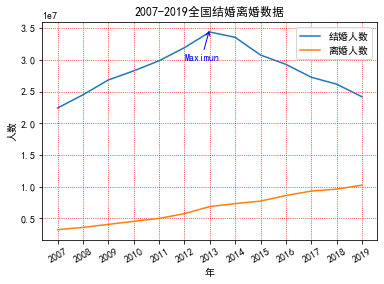

In [27]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(marryDate,marrayNum ,label="结婚人数")
plt.plot(marryDate,divorceNum,label="离婚人数")
plt.title("2007-2019全国结婚离婚数据")
plt.annotate("Maximun",
            xy=(6,34931471),
            xytext=(5,29931471),
             weight="bold",
             color="b",arrowprops=dict(
             arrowstyle="->",connectionstyle="arc3",color="b")
            )
plt.grid(linestyle=":",color="r")
plt.xticks(rotation=30)
plt.xlabel("年")
plt.ylabel("人数")
plt.savefig("8.jpg")
plt.legend()
plt.show()

In [28]:
nationalData = df.loc[2][1:]

In [29]:
print(type(nationalData))
print(len(nationalData))

<class 'pandas.core.series.Series'>
110


In [30]:
nationalData

2007年第1季度结婚登记    2395186
2007年第1季度离婚登记     266404
2007年第2季度结婚登记    4326249
2007年第2季度离婚登记     595605
2007年第3季度结婚登记    6190365
                  ...   
2020年第1季度离婚登记     612319
2020年第2季度结婚登记    3878704
2020年第2季度离婚登记    1594847
2020年第3季度结婚登记    5894196
2020年第3季度离婚登记    2669985
Name: 2, Length: 110, dtype: object

In [31]:
nationalMarryData = nationalData[::2]
nationalDivorceData = nationalData[1::2]
print(len(nationalData) == len(nationalMarryData)+len(nationalDivorceData))

True


In [32]:
# 处理结婚数据
marrayNum = nationalMarryData.values
marrayDate = np.array(list(nationalMarryData.keys()))
marrayNumber = []
for i in marrayNum:
    try:
        marrayNumber.append(int(i))
    except:
        marrayNumber.append(int(i.replace(",","")))
marrayNumber = np.array(marrayNumber)

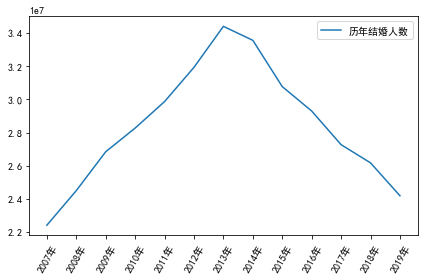

In [33]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
yDataYear = [sum(marrayNumber[i:i+4]) for i in range(0,len(marrayNumber),4)]
xDateYear = [f"{i}年" for i in range(2007,2020)]
plt.plot(xDateYear,yDataYear[:-1],label="历年结婚人数")
plt.xticks(rotation=60)
plt.tight_layout()
plt.legend()
plt.show()

In [34]:
# 进行预测使用LSTM

In [35]:
# 传入的数据为 每个年份离婚的人数
divorceNum = nationalDivorceData.values
divorceDate = np.array(list(nationalDivorceData.keys()))
divorceNumber = []
for i in divorceNum:
    try:
        divorceNumber.append(int(i))
    except:
        divorceNumber.append(int(i.replace(",","")))
divorceNumber = np.array(divorceNumber)

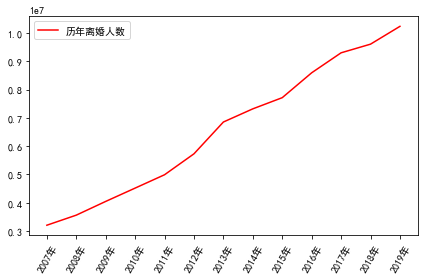

In [36]:
yDataYear = [sum(divorceNumber[i:i+4]) for i in range(0,len(divorceNumber),4)]
xDateYear = [f"{i}年" for i in range(2007,2020)]
plt.plot(xDateYear,yDataYear[:-1],label="历年离婚人数",c="r")
plt.xticks(rotation=60)
plt.tight_layout()
plt.legend()
plt.savefig("2.jpg")
plt.show()

In [37]:
xDateYear = np.array([divorceDate[i:i+4] for i in range(0,len(divorceDate),4)])
yDataYear = np.array([divorceNumber[i:i+4] for i in range(0,len(divorceNumber),4)])

C:\Users\77579\AppData\Local\Temp/ipykernel_14676/3050061417.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xDateYear = np.array([divorceDate[i:i+4] for i in range(0,len(divorceDate),4)])
C:\Users\77579\AppData\Local\Temp/ipykernel_14676/3050061417.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yDataYear = np.array([divorceNumber[i:i+4] for i in range(0,len(divorceNumber),4)])


In [38]:
xQurterDat = [f"第{i}季度" for i in range(1,5)]

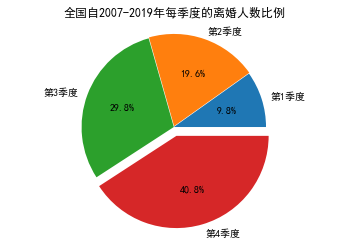

In [39]:
res = []
oneQuarterData = np.array([yDataYear[:,][i][0] for i in range(13)])
twoQuarterData = np.array([yDataYear[:,][i][1] for i in range(13)])
threeQuarterData = np.array([yDataYear[:,][i][2] for i in range(13)])
fourQuarterData = np.array([yDataYear[:,][i][3] for i in range(13)])
res.append(sum(oneQuarterData)) 
res.append(sum(twoQuarterData)) 
res.append(sum(threeQuarterData)) 
res.append(sum(fourQuarterData)) 


plt.pie(res,labels=xQurterDat,autopct='%1.1f%%',explode=(0,0.01,0,0.1))
plt.title("全国自2007-2019年每季度的离婚人数比例")
plt.axis('equal')   #该行代码使饼图长宽相等
plt.savefig("3.jpg")
plt.show()

In [40]:
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

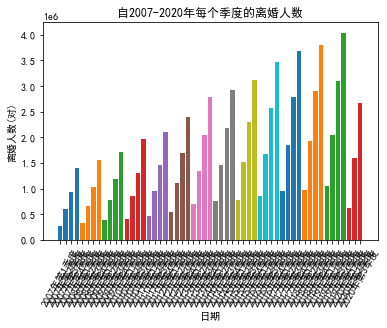

In [41]:
for i in range(len(xDateYear)):
    xDate = xDateYear[i]
    yData = yDataYear[i]
    xDate = [x[:9] for x in xDate]
    plt.bar(xDate,yData)
plt.xticks(rotation=60)
plt.xlabel("日期")
plt.ylabel("离婚人数(对)")
plt.title("自2007-2020年每个季度的离婚人数")
plt.savefig("1.jpg")
plt.show()

In [42]:
# 构建数据 可以传入LSTM
def split_sequence(sequence, n_steps):                    
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]                 
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [43]:
divorceNum =divorceNumber
divorceDate = list(nationalDivorceData.keys())

In [44]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
dataset = divorceNum.astype('float32')
dataset = np.resize(dataset,(-1,1))
#归一化 在下一步会讲解MinMaxScaler(feature_range=(0, 1), copy=True)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset = dataset.reshape(54)

ValueError: all elements of `new_shape` must be non-negative

In [45]:
xTrainData,xTrainLabel = split_sequence(dataset,4)

In [46]:
xTrainData = xTrainData.reshape((len(xTrainData),4,1))

In [47]:
# 构建网络模型
xTrainData

array([[[ 266404.],
        [ 595605.],
        [ 938240.],
        [1404047.]],

       [[ 595605.],
        [ 938240.],
        [1404047.],
        [ 321913.]],

       [[ 938240.],
        [1404047.],
        [ 321913.],
        [ 664766.]],

       [[1404047.],
        [ 321913.],
        [ 664766.],
        [1021102.]],

       [[ 321913.],
        [ 664766.],
        [1021102.],
        [1552745.]],

       [[ 664766.],
        [1021102.],
        [1552745.],
        [ 384635.]],

       [[1021102.],
        [1552745.],
        [ 384635.],
        [ 771390.]],

       [[1552745.],
        [ 384635.],
        [ 771390.],
        [1177294.]],

       [[ 384635.],
        [ 771390.],
        [1177294.],
        [1712546.]],

       [[ 771390.],
        [1177294.],
        [1712546.],
        [ 396826.]],

       [[1177294.],
        [1712546.],
        [ 396826.],
        [ 847819.]],

       [[1712546.],
        [ 396826.],
        [ 847819.],
        [1310377.]],

       [[ 396826

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,LSTM,Dropout,Dense
from tensorflow.keras import layers
model = Sequential()
model.add(LSTM(20,activation="relu",input_shape=(4,1),return_sequences=True))
model.add(LSTM(60,activation="relu",return_sequences=True))
model.add(LSTM(90,activation="relu",return_sequences=True))
model.add(LSTM(120,activation="relu",return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(LSTM(60,activation="relu",return_sequences=True))
model.add(LSTM(30,activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 20)             1760      
                                                                 
 lstm_1 (LSTM)               (None, 4, 60)             19440     
                                                                 
 lstm_2 (LSTM)               (None, 4, 90)             54360     
                                                                 
 lstm_3 (LSTM)               (None, 4, 120)            101280    
                                                                 
 dropout (Dropout)           (None, 4, 120)            0         
                                                                 
 lstm_4 (LSTM)               (None, 4, 60)             43440     
                                                                 
 lstm_5 (LSTM)               (None, 30)                1

In [49]:
history = model.fit(xTrainData,xTrainLabel,epochs=500,batch_size=100,validation_split=0.1)

Epoch 1/500
1/1 [==============================] - 5s 5s/step - loss: 3514185547776.0000 - val_loss: 6699469504512.0000
Epoch 2/500
1/1 [==============================] - 0s 38ms/step - loss: 3514975911936.0000 - val_loss: 6696181694464.0000
Epoch 3/500
1/1 [==============================] - 0s 38ms/step - loss: 3514462896128.0000 - val_loss: 6692913807360.0000
Epoch 4/500
1/1 [==============================] - 0s 38ms/step - loss: 3512441503744.0000 - val_loss: 6693460639744.0000
Epoch 5/500
1/1 [==============================] - 0s 37ms/step - loss: 3512997249024.0000 - val_loss: 6691695886336.0000
Epoch 6/500
1/1 [==============================] - 0s 38ms/step - loss: 3510732324864.0000 - val_loss: 6690924134400.0000
Epoch 7/500
1/1 [==============================] - 0s 37ms/step - loss: 3511032741888.0000 - val_loss: 6691922378752.0000
Epoch 8/500
1/1 [==============================] - 0s 37ms/step - loss: 3511244554240.0000 - val_loss: 6693528797184.0000
Epoch 9/500
1/1 [=========

1/1 [==============================] - 0s 39ms/step - loss: 2773498724352.0000 - val_loss: 4584547811328.0000
Epoch 68/500
1/1 [==============================] - 0s 38ms/step - loss: 2675194200064.0000 - val_loss: 4372882522112.0000
Epoch 69/500
1/1 [==============================] - 0s 37ms/step - loss: 2541664337920.0000 - val_loss: 4040285224960.0000
Epoch 70/500
1/1 [==============================] - 0s 37ms/step - loss: 2520931631104.0000 - val_loss: 3656418852864.0000
Epoch 71/500
1/1 [==============================] - 0s 37ms/step - loss: 2417472569344.0000 - val_loss: 3456697892864.0000
Epoch 72/500
1/1 [==============================] - 0s 36ms/step - loss: 2177325072384.0000 - val_loss: 3139394863104.0000
Epoch 73/500
1/1 [==============================] - 0s 40ms/step - loss: 2163182272512.0000 - val_loss: 3284622114816.0000
Epoch 74/500
1/1 [==============================] - 0s 38ms/step - loss: 2254391476224.0000 - val_loss: 3028127318016.0000
Epoch 75/500
1/1 [===========

1/1 [==============================] - 0s 37ms/step - loss: 367162851328.0000 - val_loss: 1156897701888.0000
Epoch 135/500
1/1 [==============================] - 0s 38ms/step - loss: 408142872576.0000 - val_loss: 1393637588992.0000
Epoch 136/500
1/1 [==============================] - 0s 37ms/step - loss: 310715219968.0000 - val_loss: 1468854697984.0000
Epoch 137/500
1/1 [==============================] - 0s 36ms/step - loss: 328360001536.0000 - val_loss: 1392200253440.0000
Epoch 138/500
1/1 [==============================] - 0s 37ms/step - loss: 329459433472.0000 - val_loss: 1321257795584.0000
Epoch 139/500
1/1 [==============================] - 0s 37ms/step - loss: 503213424640.0000 - val_loss: 1032696692736.0000
Epoch 140/500
1/1 [==============================] - 0s 38ms/step - loss: 506116603904.0000 - val_loss: 884213350400.0000
Epoch 141/500
1/1 [==============================] - 0s 37ms/step - loss: 352384024576.0000 - val_loss: 1178980450304.0000
Epoch 142/500
1/1 [============

1/1 [==============================] - 0s 38ms/step - loss: 484204052480.0000 - val_loss: 1112201363456.0000
Epoch 202/500
1/1 [==============================] - 0s 38ms/step - loss: 415161155584.0000 - val_loss: 606679138304.0000
Epoch 203/500
1/1 [==============================] - 0s 37ms/step - loss: 191417597952.0000 - val_loss: 1010176098304.0000
Epoch 204/500
1/1 [==============================] - 0s 38ms/step - loss: 300902547456.0000 - val_loss: 1109330100224.0000
Epoch 205/500
1/1 [==============================] - 0s 39ms/step - loss: 345631260672.0000 - val_loss: 858715258880.0000
Epoch 206/500
1/1 [==============================] - 0s 37ms/step - loss: 290494939136.0000 - val_loss: 514243854336.0000
Epoch 207/500
1/1 [==============================] - 0s 40ms/step - loss: 335977709568.0000 - val_loss: 919657840640.0000
Epoch 208/500
1/1 [==============================] - 0s 37ms/step - loss: 349435035648.0000 - val_loss: 849562042368.0000
Epoch 209/500
1/1 [================

1/1 [==============================] - 0s 38ms/step - loss: 314177650688.0000 - val_loss: 940351422464.0000
Epoch 269/500
1/1 [==============================] - 0s 47ms/step - loss: 221637509120.0000 - val_loss: 1546668998656.0000
Epoch 270/500
1/1 [==============================] - 0s 40ms/step - loss: 150387539968.0000 - val_loss: 1730043314176.0000
Epoch 271/500
1/1 [==============================] - 0s 36ms/step - loss: 293219270656.0000 - val_loss: 3135948980224.0000
Epoch 272/500
1/1 [==============================] - 0s 37ms/step - loss: 263798767616.0000 - val_loss: 3012257644544.0000
Epoch 273/500
1/1 [==============================] - 0s 38ms/step - loss: 207451783168.0000 - val_loss: 2823228751872.0000
Epoch 274/500
1/1 [==============================] - 0s 37ms/step - loss: 375479500800.0000 - val_loss: 2674812256256.0000
Epoch 275/500
1/1 [==============================] - 0s 38ms/step - loss: 162606940160.0000 - val_loss: 1292623020032.0000
Epoch 276/500
1/1 [============

1/1 [==============================] - 0s 35ms/step - loss: 185314705408.0000 - val_loss: 264704311296.0000
Epoch 336/500
1/1 [==============================] - 0s 38ms/step - loss: 293537742848.0000 - val_loss: 262530662400.0000
Epoch 337/500
1/1 [==============================] - 0s 38ms/step - loss: 267456102400.0000 - val_loss: 370248417280.0000
Epoch 338/500
1/1 [==============================] - 0s 37ms/step - loss: 201212723200.0000 - val_loss: 457796747264.0000
Epoch 339/500
1/1 [==============================] - 0s 37ms/step - loss: 332060819456.0000 - val_loss: 453259919360.0000
Epoch 340/500
1/1 [==============================] - 0s 37ms/step - loss: 459152982016.0000 - val_loss: 452024860672.0000
Epoch 341/500
1/1 [==============================] - 0s 38ms/step - loss: 295974109184.0000 - val_loss: 485914214400.0000
Epoch 342/500
1/1 [==============================] - 0s 37ms/step - loss: 151889854464.0000 - val_loss: 587983421440.0000
Epoch 343/500
1/1 [===================

1/1 [==============================] - 0s 37ms/step - loss: 289684324352.0000 - val_loss: 633755992064.0000
Epoch 403/500
1/1 [==============================] - 0s 36ms/step - loss: 261423235072.0000 - val_loss: 343845928960.0000
Epoch 404/500
1/1 [==============================] - 0s 37ms/step - loss: 320001966080.0000 - val_loss: 387368976384.0000
Epoch 405/500
1/1 [==============================] - 0s 36ms/step - loss: 184317739008.0000 - val_loss: 344137793536.0000
Epoch 406/500
1/1 [==============================] - 0s 37ms/step - loss: 206465892352.0000 - val_loss: 372933918720.0000
Epoch 407/500
1/1 [==============================] - 0s 37ms/step - loss: 186967687168.0000 - val_loss: 369753686016.0000
Epoch 408/500
1/1 [==============================] - 0s 38ms/step - loss: 203572019200.0000 - val_loss: 377108987904.0000
Epoch 409/500
1/1 [==============================] - 0s 37ms/step - loss: 276989116416.0000 - val_loss: 311877861376.0000
Epoch 410/500
1/1 [===================

1/1 [==============================] - 0s 36ms/step - loss: 167815610368.0000 - val_loss: 252792750080.0000
Epoch 470/500
1/1 [==============================] - 0s 38ms/step - loss: 137581576192.0000 - val_loss: 260899405824.0000
Epoch 471/500
1/1 [==============================] - 0s 37ms/step - loss: 248374919168.0000 - val_loss: 316547891200.0000
Epoch 472/500
1/1 [==============================] - 0s 37ms/step - loss: 163045785600.0000 - val_loss: 297267593216.0000
Epoch 473/500
1/1 [==============================] - 0s 38ms/step - loss: 132324417536.0000 - val_loss: 300431015936.0000
Epoch 474/500
1/1 [==============================] - 0s 37ms/step - loss: 185253675008.0000 - val_loss: 302965096448.0000
Epoch 475/500
1/1 [==============================] - 0s 38ms/step - loss: 168289533952.0000 - val_loss: 299682988032.0000
Epoch 476/500
1/1 [==============================] - 0s 38ms/step - loss: 155506835456.0000 - val_loss: 297039462400.0000
Epoch 477/500
1/1 [===================

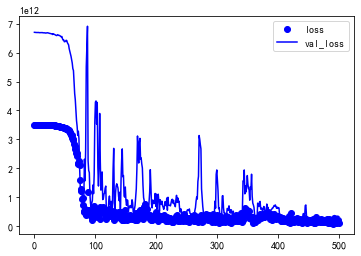

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(500),loss,"bo",label="loss")
plt.plot(range(500),val_loss,"b",label='val_loss')
plt.legend()
plt.savefig("5.jpg")
plt.show()

In [51]:
xTrainLabel =xTrainLabel.reshape(-1,1)

In [52]:
trainPredict = model.predict(xTrainData)
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(xTrainLabel)

2/2 [==============================] - 1s 4ms/step


NameError: name 'scaler' is not defined

In [ ]:
plt.plot(trainY,label="实际曲线")
plt.plot(trainPredict[1:],label="预测曲线")
plt.xlabel("时间")
plt.ylabel("离婚人数")
plt.legend()
plt.savefig("7.jpg")
plt.show()